# Final Project COSC74
## Tal Sternberg 

In [1]:
# imports
import autograd.numpy as np
from autograd import grad 
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sn
import csv

# Setting up the Data

In [2]:
# open the files and read
df_train=pd.read_csv('Train.csv')
df_test=pd.read_csv('Test.csv') 
df_train.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style,category
0,1,False,"11 12, 2016",C413C78E10E54C5DB41837889F36C1E8,565D194F38B1CC3F806EE677C61F639C,465E154EC79AFFAB5EB2607198B21433,all of the reviews for this product are fake.,"All fake reviews, beware.",1478908800,2.0,NaN,{'Size:': ' Polaris H4'},automotive
1,1,True,"12 6, 2016",490AE37808EFEE3AF4FE6DEBDEB5A4C8,0D66512A0A7F580523AB996378DF0F14,760C63E8E5E8DC3FAA01878D37BA5678,wrong part. our fault.,One Star,1480982400,NaN,NaN,NaN,automotive
2,1,True,"09 17, 2014",74A9FA5A64449BEE2A2E8E3F62872F0F,A0E45600FF2C5A779CB4314F379C253A,C6E4DD5C1C4EC09E90182644ED6CA9EF,this wire set it really sucks!!!,One Star,1410912000,NaN,NaN,NaN,automotive
3,1,True,"06 11, 2016",EB561158A2829D98B467FE03CC1E45F1,37AB9A82470595E0ACB88BAC48C150EE,F4892A77EA45C52F40AB17ED537EF9FF,"first use, it leaked instantly. even at 5 buck...",One Star,1465603200,NaN,NaN,"{'Color:': ' Clear', 'Style:': ' 45 Degree'}",automotive
4,1,True,"12 23, 2017",5045D801332850D21618DD13A697CD9B,5772FF30428EEB8E0258C1A53CA2EC50,522F0BBFF2B47F1D63FF781A0AB1D079,didn't fit,One Star,1513987200,NaN,NaN,NaN,automotive


In [3]:
# check the catagory null sums
df_train.isnull().sum()
df_test.isnull().sum()

# check the null sums for every col
df_train.isnull().sum().sum()
df_test.isnull().sum().sum()

# remove missing vals
df_train.dropna()
df_test.dropna()

# get the testing and training sets with no NaN
df_train.replace(np. nan,'',regex=True) 
df_test.replace(np. nan,'',regex=True) 

,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style,category
0,True,"07 23, 2015",28EA11D68FB7FF05B5ABB5989B0EDDD2,2CC19105CB9E7E4C30B1A399F3BFA181,B468F2974AA56619CF81B9DB66277892,ordered 318c and receive the 303c. my bad. i d...,Wrong filter,1437609600,,,,automotive
1,True,"11 14, 2016",465EF4B95F3C23F3D2E0DF032806B593,44FF14695671384604654465F32F51BE,B9CBF62E157F0A8798A4D33BA089CE2B,slime must have a serious manufacturing defect...,Don't waste your time on the compressor lottery.,1479081600,6.0,,,automotive
2,True,"12 8, 2016",139CE33FEE21437434272524E638F60B,FD46962FBDA48B8BCB6BCCDE86515E83,68A0EDEBA61ACC7DD4096275BBFA6C8A,while the description says will not produce an...,Not error free in 2012 Mini Countryman S ALL4,1481155200,,,,automotive
3,True,"06 16, 2016",5FAB0AEBEEF467F40843E12D1AD2176C,B602B679B1EDBD9C59BC91802E521324,5C6E597BBBCACE38B3335C3D02CB0522,"this keys could not start my truck, after cutt...","This keys could not start my truck, after cutt...",1466035200,,,{'Color:': ' Black'},automotive
4,False,"12 3, 2016",EEEFD48788F090F22767829BD219B24C,DA059E333E0AF68256582317DBEDA711,50DDC9EE6BA5B5E97F77CDC57CC32EFD,kept on trickle charger when the hd was not ri...,Kept on trickle charger when the HD was not ri...,1480723200,,,,automotive
...,...,...,...,...,...,...,...,...,...,...,...,...
4495,True,"05 21, 2016",96229E77FBE5E282B1C28D480C4A7E9D,3D9B6884A0E19B6E98C4397E8AEC6969,471965BDE985724707CC087CE0E713FC,the name schleich speaks for itself.,Five Stars,1463788800,,,{'Product Packaging:': ' Standard Packaging'},toys
4496,True,"12 22, 2014",010ED927C28962D8BCEF691AC3C2CF61,E5B78BCDC7C77E82F9200E8E876EF31F,557BB4EFC53486EFFC9C113FE2B1A9E7,was what i expected,Five Stars,1419206400,,,,toys
4497,True,"12 17, 2011",CB6E508974747F4052E87E8FAC4851AD,9DE6FD79FECA9146D5350C831A95AE07,4DEDB16F4FFA333ADEAA4CD80A46B4BD,my son loves it. every time it's in the playr...,Great,1324080000,,,{'Color:': ' Regular'},toys
4498,True,"05 23, 2018",6554C955821D198A9A120131E0ABC9A4,90430F87881E42941D83893F647945A2,BCCA8B84B04D85C637DF6503D9227641,very cute. fits in car seat handle but is defi...,Five Stars,1527033600,,,,toys


In [4]:
# get the targets for the training set 
def targets(cutoff):
    targets = []
    for o in df_train['overall']:
        if o>cutoff:
            targets.append(1)
        else:
            targets.append(0)
    return targets

In [5]:
# import and define necessary functions 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

CVectorizer=CountVectorizer(ngram_range=(1,3),min_df=5)

# fit vectors
uni_bigrams_train=CVectorizer.fit(df_train['reviewText'])
uni_bigrams_test=CVectorizer.fit(df_test['reviewText'])

# get the training and testing vectors 
X_train_vectorized=uni_bigrams_train.transform(df_train['reviewText'])
X_test_vectorized=uni_bigrams_test.transform(df_test['reviewText'])

#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# Binary Classification

## Binary Classification 1: Logistic Regression
Note: there are fewer iterations because this model is quite slow, thus it is the least accurate. Also, I got "max iter reached" errors but my code still runs and produces output. Scroll past these errors to see output.

beginning calculations
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Cutoff 1:
Cross Validation accuracy scores: [-0.08324769 -0.105173   -0.09146968 -0.08393285 -0.10212474]
Cross Validation accuracy: -0.093 +/- 0.009
Best parameters: {'max_iter': 550, 'C': 0.20408163265306123}
Score for cutoff 1: 0.5731829954067071
Confusion Matrix for cutoff 1: [[ 2095   920]
 [  101 11478]]
ROC AUC Score for cutoff 1: 0.9804247467501713
F1 score for cutoff 1: 0.8807429210749663
Accuracy for cutoff 1: 0.930039742359874
ROC CURVE


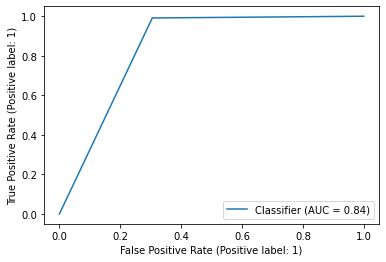

beginning calculations
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/talsternberg/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/talsternberg/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Cutoff 2:
Cross Validation accuracy scores: [-0.12127441 -0.13463515 -0.12572799 -0.13292223 -0.1394791 ]
Cross Validation accuracy: -0.131 +/- 0.006
Best parameters: {'max_iter': 550, 'C': 0.20408163265306123}
Score for cutoff 2: 0.7023673562618287
Confusion Matrix for cutoff 2: [[5248  722]
 [ 328 8296]]
ROC AUC Score for cutoff 2: 0.9811343067377706
F1 score for cutoff 2: 0.9247711764791016
Accuracy for cutoff 2: 0.9280526243661779
ROC CURVE


/Users/talsternberg/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


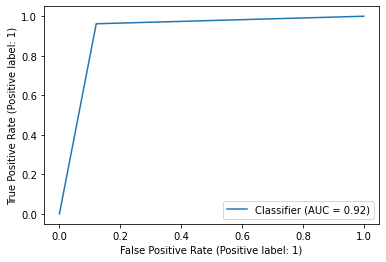

beginning calculations
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/talsternberg/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/talsternberg/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/talsternberg/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/talsternberg/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Cutoff 3:
Cross Validation accuracy scores: [-0.11202467 -0.12264474 -0.11956149 -0.11716341 -0.12268677]
Cross Validation accuracy: -0.119 +/- 0.004
Best parameters: {'max_iter': 550, 'C': 0.20408163265306123}
Score for cutoff 3: 0.7384922858559748
Confusion Matrix for cutoff 3: [[8488  342]
 [ 570 5194]]
ROC AUC Score for cutoff 3: 0.984974620855185
F1 score for cutoff 3: 0.9341540677885605
Accuracy for cutoff 3: 0.9375085651637659
ROC CURVE


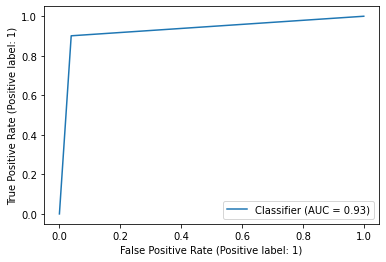

beginning calculations
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/talsternberg/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Cutoff 4:
Cross Validation accuracy scores: [-0.08804385 -0.08256252 -0.09249743 -0.08084961 -0.07539411]
Cross Validation accuracy: -0.084 +/- 0.006
Best parameters: {'max_iter': 550, 'C': 0.20408163265306123}
Score for cutoff 4: 0.5553203792785166
Confusion Matrix for cutoff 4: [[11654   159]
 [  842  1939]]
ROC AUC Score for cutoff 4: 0.9805006265533132
F1 score for cutoff 4: 0.8768284213538827
Accuracy for cutoff 4: 0.9314101685624229
ROC CURVE


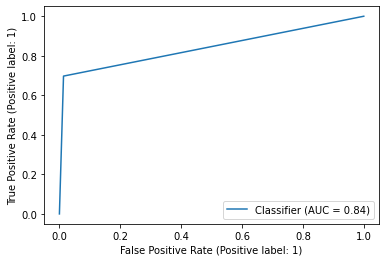

In [15]:
# iterate through cutoffs
for i in range(1,5):
    # perform logistic regression around a cutoff
    df_train['Estimated Targets'] = targets(i)
    y_train = df_train['Estimated Targets']
    
    # break up the data to run this classifier with each cutoff
    X_train_use, X_test_use, y_train_use, y_test_use = train_test_split(X_train_vectorized, y_train, test_size=0.5)
    print("beginning calculations") # check that its running -- it is slow
    # find the parameters best for model
    mod = RandomizedSearchCV(LogisticRegression(random_state=0),
                           {'C' : np.linspace(0, 10, 50),
                            'max_iter' : [500, 550,750, 1000]
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1, 
                             n_iter=10, random_state = 0
                         )
    # fit and predict based on the parameters
    mod.fit(X_train_use,y_train_use)
    mod.predict(X_train_use[:2, :])
    
    # obtain confusion matrix, predicted y, scores, roc-auc, f1, accuracy
    y_pred = mod.predict(X_train_use)
    c = confusion_matrix(y_train_use, y_pred)
    m = mod.score(X_train_use, y_train_use)
    r = roc_auc_score(y_train_use, mod.decision_function(X_train_use))
    f = f1_score(y_train_use, y_pred, average='macro')
    a = accuracy_score(y_train_use, y_pred)
    scores = cross_val_score(mod, X_train_use, y_pred, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
    
    # print all of our output for each cuttoff
    print("Cutoff " + str(i) + ":")
    print('Cross Validation accuracy scores: %s' % scores)
    print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))
    print('Best parameters: '  + str(mod.best_params_))
    print("Score for cutoff " + str(i) + ": " + str(m))
    print("Confusion Matrix for cutoff " + str(i) + ": " + str(c))
    print("ROC AUC Score for cutoff " + str(i) + ": " + str(r))
    print("F1 score for cutoff " + str(i) + ": " + str(f))
    print("Accuracy for cutoff " + str(i) + ": " + str(a))
    print("ROC CURVE")
    RocCurveDisplay.from_predictions(y_train_use, y_pred) 
    plt.show()
    


## Binary Classification 2: Ridge Classifier

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
1:
Cross Validation accuracy scores: [-0.10483042 -0.09386776 -0.0950668  -0.09660843 -0.10107932]
Cross Validation accuracy: -0.098 +/- 0.004
Best Params: {'max_iter': 750, 'alpha': 9.183673469387756}
Score for cutoff 1: 0.4636461806051727
Confusion Matrix for cutoff 1: [[ 3653  2304]
 [  239 22993]]
ROC AUC Score for cutoff 1: 0.9653629578901318
F1 score for cutoff 1: 0.8446997706749234
Accuracy for cutoff 1: 0.9128781390249752
ROC CURVE


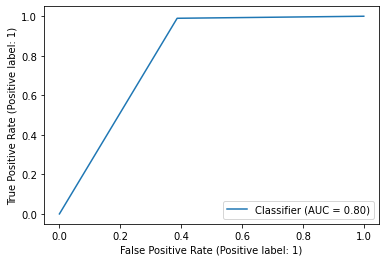

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
2:
Cross Validation accuracy scores: [-0.14063035 -0.13583419 -0.13686194 -0.14405618 -0.14750728]
Cross Validation accuracy: -0.141 +/- 0.004
Best Params: {'max_iter': 750, 'alpha': 9.183673469387756}
Score for cutoff 2: 0.6128461378669385
Confusion Matrix for cutoff 2: [[ 9954  1962]
 [  768 16505]]
ROC AUC Score for cutoff 2: 0.9727440634199135
F1 score for cutoff 2: 0.9015106525898755
Accuracy for cutoff 2: 0.9064716160197335
ROC CURVE


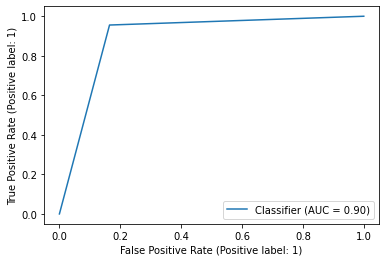

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
3:
Cross Validation accuracy scores: [-0.1294964  -0.13275094 -0.13189448 -0.12675574 -0.13225972]
Cross Validation accuracy: -0.131 +/- 0.002
Best Params: {'max_iter': 750, 'alpha': 9.183673469387756}
Score for cutoff 3: 0.655541619505937
Confusion Matrix for cutoff 3: [[16972   806]
 [ 1588  9823]]
ROC AUC Score for cutoff 3: 0.9765570913011908
F1 score for cutoff 3: 0.9127489319625508
Accuracy for cutoff 3: 0.9179828017403816
ROC CURVE


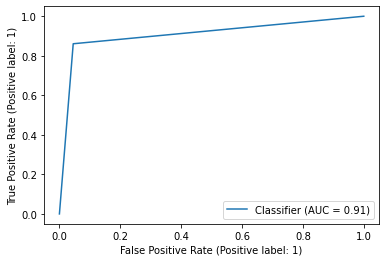

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
4:
Cross Validation accuracy scores: [-0.08615964 -0.09609455 -0.08838643 -0.09986297 -0.09576837]
Cross Validation accuracy: -0.093 +/- 0.005
Best Params: {'max_iter': 750, 'alpha': 9.183673469387756}
Score for cutoff 4: 0.401069537635116
Confusion Matrix for cutoff 4: [[23211   336]
 [ 2390  3252]]
ROC AUC Score for cutoff 4: 0.9652266699075621
F1 score for cutoff 4: 0.8245967979087376
Accuracy for cutoff 4: 0.9066086539449792
ROC CURVE
Fitting 5 folds for each of 10 candidates, totalling 50 fits


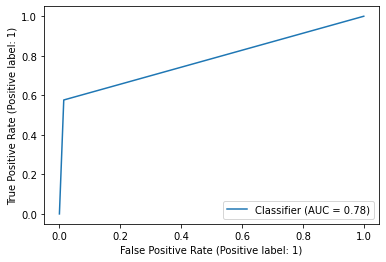

In [8]:
# run through cutoffs and report scores
for i in range(1,5):
    # perform classification around a cutoff
    df_train['Estimated Targets'] = targets(i)
    y_train = df_train['Estimated Targets']
    # find the parameters best for model
    mod = RandomizedSearchCV(RidgeClassifier(random_state=0),
                           {'alpha' : np.linspace(0, 10, 50),
                            'max_iter' : [500,550,750,1000]
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1, 
                             n_iter=10, random_state = 0
                           )
    # fit and predict using the parameters
    mod.fit(X_train_vectorized,y_train)
    mod.predict(X_train_vectorized[:2, :])
    
    # obtain confusion matrix
    y_pred = mod.predict(X_train_vectorized)
    c = confusion_matrix(y_train, y_pred)
    m = mod.score(X_train_vectorized, y_train)
    r = roc_auc_score(y_train, mod.decision_function(X_train_vectorized))
    f = f1_score(y_train, y_pred, average='macro')
    a = accuracy_score(y_train, y_pred)
    scores = cross_val_score(mod, X_train_vectorized, y_pred, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
    
    # print the output I want
    print(str(i) + ":")
    print('Cross Validation accuracy scores: %s' % scores)
    print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))
    
    print('Best Params: ' + str(mod.best_params_))
    print("Score for cutoff " + str(i) + ": " + str(m))
    print("Confusion Matrix for cutoff " + str(i) + ": " + str(c))
    print("ROC AUC Score for cutoff " + str(i) + ": " + str(r))
    print("F1 score for cutoff " + str(i) + ": " + str(f))
    print("Accuracy for cutoff " + str(i) + ": " + str(a))
    print("ROC CURVE")
    RocCurveDisplay.from_predictions(y_train, y_pred) 
    plt.show()

## Binary Classification 3: Perceptron

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
1:
Cross Validation accuracy scores: [-0.1336074  -0.12418637 -0.1294964  -0.1235012  -0.13071783]
Cross Validation accuracy: -0.128 +/- 0.004
Best Parameters: {'max_iter': 750, 'alpha': 0.8163265306122449}
Score for cutoff 1: 0.6140277272935376
Confusion Matrix for cutoff 1: [[ 4819  1138]
 [  692 22540]]
ROC AUC Score for cutoff 1: 0.9767722360051905
F1 score for cutoff 1: 0.9007073300162829
Accuracy for cutoff 1: 0.9373051492000412
ROC CURVE


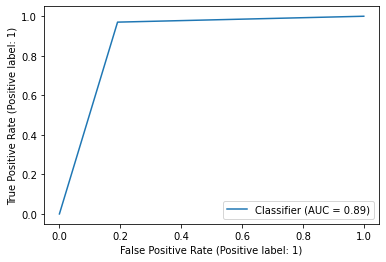

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
2:
Cross Validation accuracy scores: [-0.14628297 -0.15861596 -0.14833847 -0.15673176 -0.15761521]
Cross Validation accuracy: -0.154 +/- 0.005
Best Parameters: {'max_iter': 750, 'alpha': 0.8163265306122449}
Score for cutoff 2: 0.6200786825441496
Confusion Matrix for cutoff 2: [[ 9904  2012]
 [  667 16606]]
ROC AUC Score for cutoff 2: 0.9715243456156663
F1 score for cutoff 2: 0.9031109157051225
Accuracy for cutoff 2: 0.9082188495666176
ROC CURVE


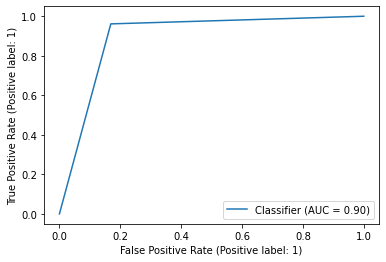

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
3:
Cross Validation accuracy scores: [-0.14594039 -0.15159301 -0.14028777 -0.15981501 -0.14699332]
Cross Validation accuracy: -0.149 +/- 0.007
Best Parameters: {'max_iter': 750, 'alpha': 0.8163265306122449}
Score for cutoff 3: 0.7292102455765135
Confusion Matrix for cutoff 3: [[17037   741]
 [ 1141 10270]]
ROC AUC Score for cutoff 3: 0.9851719267079401
F1 score for cutoff 3: 0.9318614142009403
Accuracy for cutoff 3: 0.9355236561718455
ROC CURVE


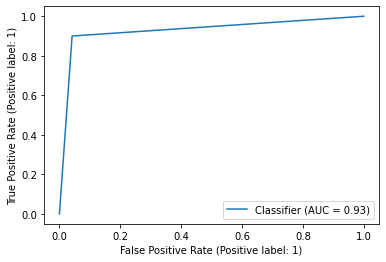

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
4:
Cross Validation accuracy scores: [-0.117506   -0.12076053 -0.11956149 -0.12658445 -0.11906801]
Cross Validation accuracy: -0.121 +/- 0.003
Best Parameters: {'max_iter': 750, 'alpha': 0.8163265306122449}
Score for cutoff 4: 0.595952633789794
Confusion Matrix for cutoff 4: [[22662   885]
 [  954  4688]]
ROC AUC Score for cutoff 4: 0.9794305887685361
F1 score for cutoff 4: 0.8985153763648857
Accuracy for cutoff 4: 0.9369968138682381
ROC CURVE


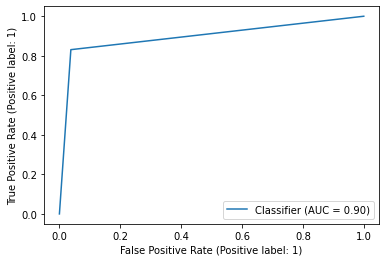

In [10]:
# run through cutoffs and report scores
for i in range(1,5):
    # perform classification around a cutoff
    df_train['Estimated Targets'] = targets(i)
    y_train = df_train['Estimated Targets']
    
    # find the parameters best for model
    mod = RandomizedSearchCV(Perceptron(random_state=0),
                           {'alpha' : np.linspace(0, 10, 50),
                            'max_iter' : [500, 550,750,1000]
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1, 
                             n_iter=50, random_state = 0
                           )
    # fit and predict using these best params
    mod.fit(X_train_vectorized,y_train)
    mod.predict(X_train_vectorized[:2, :])
    
    # obtain confusion matrix and other specified values
    y_pred = mod.predict(X_train_vectorized)
    c = confusion_matrix(y_train, y_pred)
    m = mod.score(X_train_vectorized, y_train)
    r = roc_auc_score(y_train, mod.decision_function(X_train_vectorized))
    f = f1_score(y_train, y_pred, average='macro')
    a = accuracy_score(y_train, y_pred)
    scores = cross_val_score(mod, X_train_vectorized, y_pred, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
    
    # print the values I want
    print(str(i) + ":")
    print('Cross Validation accuracy scores: %s' % scores)
    print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))
   
    print('Best Parameters: ' + str(mod.best_params_))
    print("Score for cutoff " + str(i) + ": " + str(m))
    print("Confusion Matrix for cutoff " + str(i) + ": " + str(c))
    print("ROC AUC Score for cutoff " + str(i) + ": " + str(r))
    print("F1 score for cutoff " + str(i) + ": " + str(f))
    print("Accuracy for cutoff " + str(i) + ": " + str(a))

    print("ROC CURVE")
    RocCurveDisplay.from_predictions(y_train, y_pred) 
    plt.show()

A note on model parameters: certain model parameters help the model itself based on how "good" it is working with your specific data set. Based on my data collection and reported metrics, it appears that the Perceptron has the best model parameters to report the most accurate predicted values. The hyperparameter tuning works based on the model and the data we give to the model to optimize the performance in terms of time and accuracy. Here, the perceptron works fastest and most accurretly. This may be because I can give the RandomEstimator more iterations with the Perceptron and it won't time out, but it may also just be that the model does find the best fit for the data.

# Multiclass Classification

## Multiclass Classification: Logistic Regression
Again, please scroll past errors in the output. It still produces the desired output it just maxes out time/iterations.

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Cross Validation accuracy scores: [-1.91952055 -2.11472603 -2.0119863  -1.97084048 -1.74271012] - these would make the best hyperparamters for the model
Cross Validation accuracy: -1.952 +/- 0.123 - this would make the best hyperparameter for the model
Best Parameters: {'max_iter': 1500, 'C': 0.8163265306122449}
Score: 0.9737338928102915
Confusion Matrix: [[577   2   0   0   2]
 [  2 602   1   1   5]
 [  2   3 565   1   6]
 [  1   0   1 560  19]
 [  0   0   0   1 567]]
ROC AUC Score for cutoff 4: 0.999512334627477
F1 score: 0.9838545443794967
Accuracy: 0.9838930774503084
The classification Output:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       581
           2       0.99      0.99      0.99       611
           3       1.00      0.98      0.99       577
           4       0.99      0.96      0.98       581
           5       0.95      1.00      0.97       568

    accu

/Users/talsternberg/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


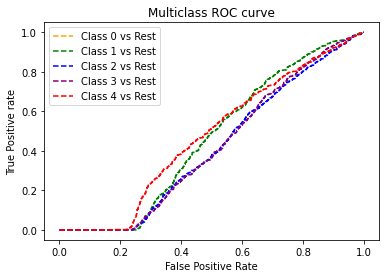

In [11]:
# the targets are now just the overall
y_train = df_train['overall']

# split the data for logistic regression to run
X_train_use, X_test_use, y_train_use, y_test_use = train_test_split(X_train_vectorized, y_train, test_size=0.90)


# perform logistic regression 
mod = RandomizedSearchCV(LogisticRegression(random_state=0),
                           {'C' : np.linspace(0, 10, 50),
                            'max_iter': [500,1000,1500,2000]
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1, 
                             n_iter=10, random_state = 0
                           )
mod.fit(X_train_use,y_train_use)
mod.predict(X_train_use[:2, :])
    
# obtain confusion matrix, predicted y, scores, roc-auc, f1, accuracy, and scores from cross validation
y_pred = mod.predict(X_train_use)
y_pred_p = mod.predict_proba(X_train_use)
c = confusion_matrix(y_train_use, y_pred)
m = mod.score(X_train_use, y_train_use)
r = roc_auc_score(y_train_use, mod.predict_proba(X_train_use),multi_class='ovo')
f = f1_score(y_train_use, y_pred, average='macro')
a = accuracy_score(y_train_use, y_pred)
scores = cross_val_score(mod, X_train_use, y_pred, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
 
# print cross validation scores and accuracy
print('Cross Validation accuracy scores: %s' % scores + " - these would make the best hyperparamters for the model")
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)) + " - this would make the best hyperparameter for the model")
   
# print all desired scores
print('Best Parameters: ' + str(mod.best_params_))
print("Score: " + str(m))
print("Confusion Matrix: " + str(c))
print("ROC AUC Score for cutoff " + str(i) + ": " + str(r))
print("F1 score: " + str(f))
print("Accuracy: " + str(a))

# metrics output
print("The classification Output:")
print(metrics.classification_report(y_train_use, y_pred))


# plotting the ROC
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_train_use, y_pred_p[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='purple', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 



## Multiclass Classification:  Ridge Classifier

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Cross Validation accuracy scores: [-1.82191781 -2.09075342 -2.23287671 -1.93825043 -2.23156089]
Cross Validation accuracy: -2.063 +/- 0.162
Best Parameters: {'max_iter': 1500, 'alpha': 9.183673469387756}
Score: 0.9548251129375143
Confusion Matrix: [[597   3   3   1   4]
 [  8 557   4   1   4]
 [  6   1 592   2   9]
 [  0   0   5 542  29]
 [  1   0   1   4 544]]
F1 score: 0.9703515411894397
Accuracy: 0.9705277587388622
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       608
           2       0.99      0.97      0.98       574
           3       0.98      0.97      0.97       610
           4       0.99      0.94      0.96       576
           5       0.92      0.99      0.95       550

    accuracy                           0.97      2918
   macro avg       0.97      0.97      0.97      2918
weighted avg       0.97      0.97      0.97      2918

ROC AUC Score: 0.9554761098

/Users/talsternberg/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


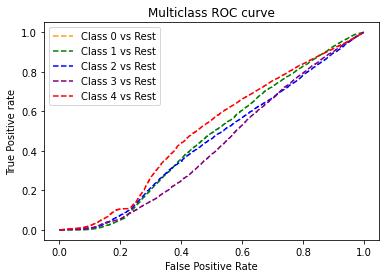

In [13]:
# define the model and the training data
y_train = df_train['overall']

# split the data to not time out
X_train_use, X_test_use, y_train_use, y_test_use = train_test_split(X_train_vectorized, y_train, test_size=0.90)


# use the model as an estimator w randomsearch
mod = RandomizedSearchCV(RidgeClassifier(random_state=0),
                           {'alpha' : np.linspace(0, 10, 50),
                            'max_iter' : [500, 1000,1500, 2000]
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1, 
                             n_iter=20, random_state = 0
                           )
# make a model with the best hyperparameters
mod.fit(X_train_use,y_train_use)
mod.predict(X_train_use[:2, :])


# obtain confusion matrix, predicted y, scores, roc-auc, f1, accuracy, and scores from cross validation
y_pred = mod.predict(X_train_use)
c = confusion_matrix(y_train_use, y_pred)
m = mod.score(X_train_use, y_train_use)
f = f1_score(y_train_use, y_pred, average='macro')
a = accuracy_score(y_train_use, y_pred)
scores = cross_val_score(mod, X_train_use, y_pred, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

# print the cross validation scores and accuracy
print('Cross Validation accuracy scores: %s' % scores)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))  

# print the desired values
print('Best Parameters: ' + str(mod.best_params_))
print("Score: " + str(m))
print("Confusion Matrix: " + str(c))
print("F1 score: " + str(f))
print("Accuracy: " + str(a))

# print the metrics
print(metrics.classification_report(y_train_use, y_pred))


# retain this model to get the ROC -- incompatibility with Random due to predict proba
model=Perceptron(max_iter=1000)
y_train = df_train['overall']
# use the model
mod = model.fit(X_train_vectorized,y_train)    
y_pred_p = mod._predict_proba_lr(X_train_vectorized)
r = roc_auc_score(y_train, y_pred_p,multi_class='ovr')
print("ROC AUC Score: " + str(r))


# plot the ROC curves
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_train, y_pred_p[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='purple', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 


## Multiclass Classification: Perceptron

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Cross Validation accuracy scores: [-2.15239726 -1.96232877 -1.79965753 -1.91080617 -1.91080617]
Cross Validation accuracy: -1.947 +/- 0.116
Best Parameters: {'max_iter': 1500, 'alpha': 0.8163265306122449}
Score: 0.9732196987760471
Confusion Matrix: [[602   1   0   0   1]
 [  0 621   1   0   6]
 [  0   1 562   2  10]
 [  1   1   0 571  14]
 [  0   0   2   3 519]]
F1 score: 0.9847831775466005
Accuracy: 0.9852638793694312
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       604
           2       1.00      0.99      0.99       628
           3       0.99      0.98      0.99       575
           4       0.99      0.97      0.98       587
           5       0.94      0.99      0.97       524

    accuracy                           0.99      2918
   macro avg       0.98      0.99      0.98      2918
weighted avg       0.99      0.99      0.99      2918

ROC AUC Score: 0.955476109

/Users/talsternberg/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


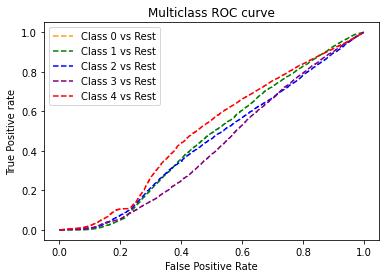

In [14]:
# define the model and the training data
y_train = df_train['overall']

# split the data to not time out
X_train_use, X_test_use, y_train_use, y_test_use = train_test_split(X_train_vectorized, y_train, test_size=0.90)


# use the model as an estimator w randomsearch
mod = RandomizedSearchCV(Perceptron(random_state=0),
                           {'alpha' : np.linspace(0, 10, 50),
                            'max_iter' : [500, 1000,1500, 2000]
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1, 
                             n_iter=50, random_state = 0
                           )
# make a model with the best hyperparameters
mod.fit(X_train_use,y_train_use)
mod.predict(X_train_use[:2, :])

    
# obtain confusion matrix, predicted y, scores, roc-auc, f1, accuracy, and scores from cross validation
y_pred = mod.predict(X_train_use)
c = confusion_matrix(y_train_use, y_pred)
m = mod.score(X_train_use, y_train_use)
f = f1_score(y_train_use, y_pred, average='macro')
a = accuracy_score(y_train_use, y_pred)
scores = cross_val_score(mod, X_train_use, y_pred, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

# print the cross validation scores and accuracy
print('Cross Validation accuracy scores: %s' % scores)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))  

# print the desired values
print('Best Parameters: ' + str(mod.best_params_))
print("Score: " + str(m))
print("Confusion Matrix: " + str(c))
print("F1 score: " + str(f))
print("Accuracy: " + str(a))

# print the metrics
print(metrics.classification_report(y_train_use, y_pred))



# retain this model to get the ROC -- incompatibility with Random due to predict proba
model=Perceptron(max_iter=1000)
y_train = df_train['overall']
# use the model
mod = model.fit(X_train_vectorized,y_train)    
y_pred_p = mod._predict_proba_lr(X_train_vectorized)
r = roc_auc_score(y_train, y_pred_p,multi_class='ovr')
print("ROC AUC Score: " + str(r))


# plot the ROC curves
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_train, y_pred_p[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='purple', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 


Overall, the model parameters in the Perceptron seem to work best with multiclass classification from this dataset based on its ability to accurately predict the class of a given review. It also works remarkably faster such that n_iter can be double what it is for the other classifiers and it won't time out.

A note on the ROC curves: Soroush told me that it is okay that the class 0 is not appearing because it just means there's not enough 1 star reviews to be classified as such the way my models are built. He said this is okay.

# Clustering

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import silhouette_score

# training/true set
labels_true = df_test["category"]


# find a list of all the catagories and remove duplicates
clusters = df_test["category"]
clusters = list(set(clusters))
n = len(clusters)

# define and fit using the clusterer
clusterer = KMeans(n_clusters=n, random_state=10, max_iter=1000)
cluster_labels = clusterer.fit_predict(X_test_vectorized)

# obtain metrics needed and print
silhouette_avg = silhouette_score(X_test_vectorized, cluster_labels)
rand_index = rand_score(labels_true, cluster_labels)
print("silhouette score: " + str(silhouette_avg))
print("Rand index: " + str(rand_index))

silhouette score: 0.26725081307476384
Rand index: 0.5087202588229484


These values are pretty bad (Silouhette score should be around 1 to be good and Rand ind below 0.65 implies the model is not a great fit)

# The end!